# Unsupervised Learning

In [40]:
%matplotlib inline  

In [49]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_df['species'] = iris_df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [19]:
x = iris_df.iloc[:, [1, 2, 3, 4]].values

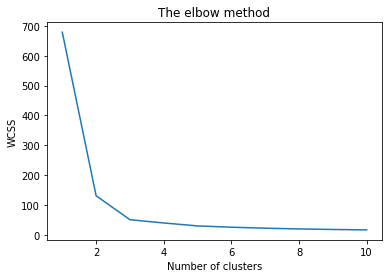

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Applying kmeans to the dataset / Creating the kmeans classifier

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [27]:
#!pip install seaborn

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


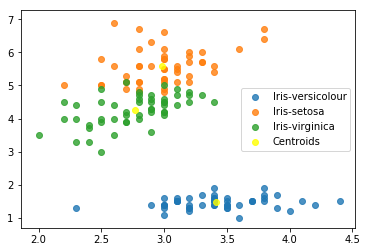

In [43]:
import seaborn as sns

sns.regplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],fit_reg=False, label = 'Iris-versicolour')
sns.regplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],fit_reg=False, label = 'Iris-setosa')
sns.regplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],fit_reg=False,label = 'Iris-virginica')

sns.regplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color = 'yellow', label = 'Centroids',fit_reg=False)
plt.legend()
plt.show()

In [50]:
pd.crosstab(iris_df['target'], iris_df['species'])

species,setosa,versicolor,virginica
target,,,
0.0,50,0,0
1.0,0,50,0
2.0,0,0,50


In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_df.iloc[:,:4],iris_df.species, test_size = .33, random_state=7)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train.head(3)

(100, 4) (50, 4) (100,) (50,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
3,4.6,3.1,1.5,0.2
39,5.1,3.4,1.5,0.2
117,7.7,3.8,6.7,2.2


# Supervised Learning

In [54]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

# Fit model to points
model.fit(x_train,y_train)

# Determine the cluster labels of new_points: labels
labels = model.predict(x_test)

# Print cluster labels of new_points
print(labels)

['virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'setosa']


In [55]:
pd.crosstab(labels, y_test)

species,setosa,versicolor,virginica
row_0,,,
setosa,14,0,0
versicolor,0,17,3
virginica,0,1,15


In [57]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(iris_df.iloc[:,:4])

# Determine the cluster labels of new_points: labels
labels = model.predict(iris_df.iloc[:,:4])

# Print cluster labels of new_points
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [59]:
pd.crosstab(labels, iris_df.species)

species,setosa,versicolor,virginica
row_0,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [60]:
print(model.inertia_)

78.94084142614602


# Deep Learning

# Networks

In [61]:
#!conda install nxviz
#import CircosPlot from nxviz.

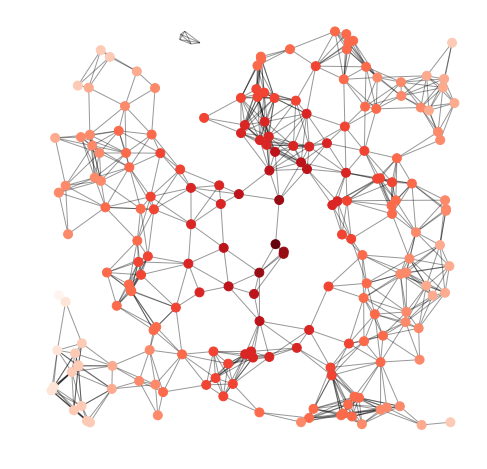

In [63]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()